In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

1 -Import the data from medical_examination.csv and assign it to the df variable.

In [2]:
df = pd.read_csv('medical_examination.csv')

In [8]:
df.head(5)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


2 -Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [12]:
df['BMI'] = df['weight']/((df['height']/100)**2)
df['overweight'] = np.where(df['BMI'] >25,1,0)
print(df[['BMI','overweight']].head(10))
df.drop(columns=['BMI'],inplace=True)

         BMI  overweight
0  21.967120           0
1  34.927679           1
2  23.507805           0
3  28.710479           1
4  23.011177           0
5  29.384676           1
6  37.729725           1
7  29.983588           1
8  28.440955           1
9  25.282570           1


3- Normalize data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1.

In [15]:
df['cholesterol'] = np.where(df['cholesterol']==1,0,1)
df['gluc'] = np.where(df['gluc']==1,0,1)

4- Draw the Categorical Plot in the draw_cat_plot function

5- Create a DataFrame for the cat plot using pd.melt with values from cholesterol, gluc, smoke, alco, active, and overweight in the df_cat variable.

6- Group and reformat the data in df_cat to split it by cardio. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.

7- Convert the data into long format and create a chart that shows the value counts of the categorical features using the following method provided by the seaborn library import: sns.catplot().

8- Get the figure for the output and store it in the fig variable.

In [19]:
def draw_cat_plot() :
    df_cat = pd.melt(df,id_vars=['cardio'], value_vars=['cholesterol','gluc','smoke','alco','active','overweight'])
    df_cat = df_cat.groupby(['cardio','variable','value']).size().reset_index(name='total')
    g = sns.catplot(x='variable',y='total',hue='value',col='cardio',kind='bar',data=df_cat)
    fig = g.fig
    fig.savefig('catplot.png')

10- Draw the Heat Map in the draw_heat_map function.

11- Clean the data in the df_heat variable by filtering out the following patient segments that represent incorrect data:

diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))

height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))

height is more than the 97.5th percentile

weight is less than the 2.5th percentile

weight is more than the 97.5th percentile

12- Calculate the correlation matrix and store it in the corr variable.

13- Generate a mask for the upper triangle and store it in the mask variable.

14- Set up the matplotlib figure.

15- Plot the correlation matrix using the method provided by the seaborn library import: sns.heatmap().

In [20]:
def draw_heat_map() :
    df_heat = df[df['ap_lo'] <= df['ap_hi']]
    df_heat = df_heat[
        (df_heat['height'] >= df_heat['height'].quantile(0.025)) &
        (df_heat['height'] <= df_heat['height'].quantile(0.975)) &
        (df_heat['weight'] >= df_heat['weight'].quantile(0.025)) &
        (df_heat['weight'] <= df_heat['weight'].quantile(0.975))
    ]
    corr = df_heat.corr()
    mask = np.triu(np.ones_like(corr,dtype=bool))
    fig,ax = plt.subplots(figsize=(12,10))
    sns.heatmap(corr,mask=mask,annot=True,fmt=".1f",cmap='coolwarm',center=0,linewidths=0.5,ax=ax)
    fig.savefig('heatmap.png')

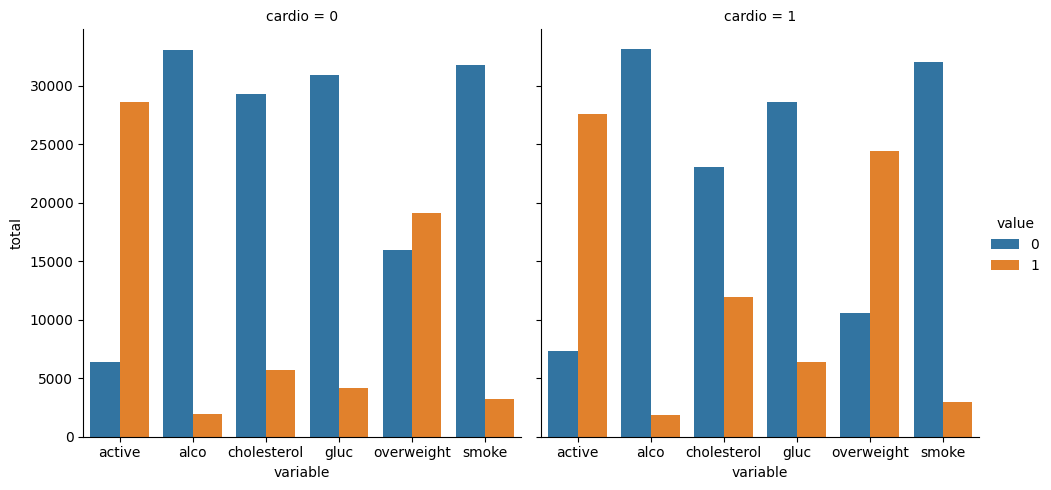

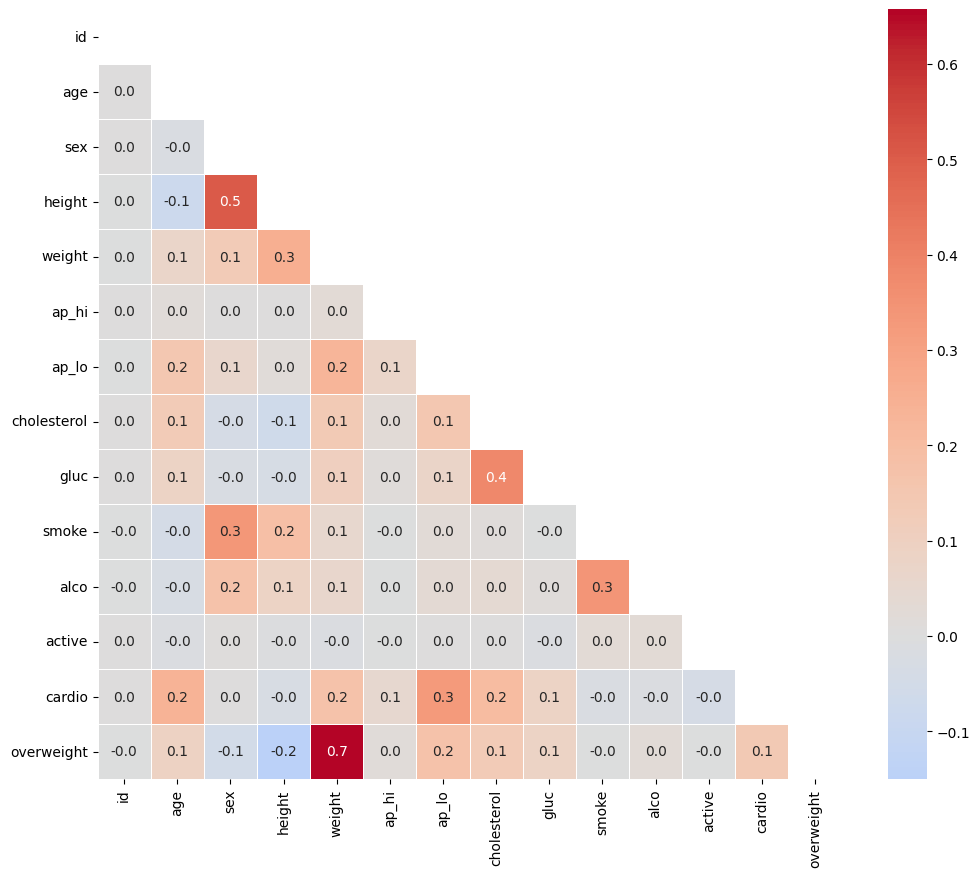

In [21]:
draw_cat_plot()
draw_heat_map()